## 1. Drift Density Graph

1. load session logs (ORPDA) - 5 characters (Eddy Lin, John Lin, Abigail Chen, Tom Moreno, Hailey Johnson)
2. Combine to one dataframe.
3. Chart density graph using sns lineplot

In [103]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

ROOT = Path.cwd().parents[2]
print(ROOT)

LOG_DIR = ROOT / "app/logs/"
print(LOG_DIR)

/Users/jaelinlee/Documents/GitHub/A2A_chat
/Users/jaelinlee/Documents/GitHub/A2A_chat/app/logs


In [104]:
# -----------------------------------------------------
# LOAD LOGS
# -----------------------------------------------------


def load_logs(log_dir):
    rows = []
    for f in log_dir.glob("session_*.log"):
        with f.open() as fh:
            for line in fh:
                try:
                    rows.append(json.loads(line))
                except:
                    pass
    return pd.DataFrame(rows)


df = load_logs(LOG_DIR)
df

# Split ORPDA and ORPA
df_orpda = df[df["use_drift"] == True].copy()
df_orpa = df[df["use_drift"] == False].copy()
print("ORPDA: ", df_orpda.shape[0], "ORPA: ", df_orpa.shape[0], "\n")

ORPDA:  512 ORPA:  0 



In [105]:
df_orpda

,ts_created,tick,sim_time,agent,use_drift,orpda
0,2025-12-16T15:53:44.572912-05:00,0,2023-02-13 06:00,John Lin,True,{'observation': {'datetime_start': '2023-02-13...
1,2025-12-16T15:53:48.090499-05:00,1,2023-02-13 06:15,John Lin,True,{'observation': {'datetime_start': '2023-02-13...
2,2025-12-16T15:53:52.092509-05:00,2,2023-02-13 06:30,John Lin,True,{'observation': {'datetime_start': '2023-02-13...
3,2025-12-16T15:53:56.074182-05:00,3,2023-02-13 06:45,John Lin,True,{'observation': {'datetime_start': '2023-02-13...
4,2025-12-16T15:54:00.202814-05:00,4,2023-02-13 07:00,John Lin,True,{'observation': {'datetime_start': '2023-02-13...
...,...,...,...,...,...,...
507,2025-12-16T18:00:43.572219-05:00,63,2023-02-13 21:45,Isabella Rodriguez,True,{'observation': {'datetime_start': '2023-02-13...
508,2025-12-16T18:00:47.550452-05:00,64,2023-02-13 22:00,Isabella Rodriguez,True,{'observation': {'datetime_start': '2023-02-13...
509,2025-12-16T18:00:52.532319-05:00,65,2023-02-13 22:15,Isabella Rodriguez,True,{'observation': {'datetime_start': '2023-02-13...
510,2025-12-16T18:00:56.623120-05:00,66,2023-02-13 22:30,Isabella Rodriguez,True,{'observation': {'datetime_start': '2023-02-13...


In [106]:
df_orpa

,ts_created,tick,sim_time,agent,use_drift,orpda


In [107]:
# -----------------------------------------------------
# ORPDA drift dataframe
# -----------------------------------------------------
raw_drift_df = pd.DataFrame(
    df_orpda.apply(lambda x: x["orpda"]["drift_decision"], axis=1).to_dict()
).T
merged_df = pd.merge(
    df_orpda, raw_drift_df, left_on=df_orpda.index, right_on=raw_drift_df.index
)
persona = merged_df[merged_df.agent == "Eddy Lin"]
persona.sample(3)

,key_0,ts_created,tick,sim_time,agent,use_drift,orpda,should_drift,drift_type,drift_topic,drift_action,drift_intensity,potential_recovery,justification,datetime_start,duration_min,state_summary
338,338,2025-12-16T15:42:54.483760-05:00,22,2023-02-13 11:30,Eddy Lin,True,{'observation': {'datetime_start': '2023-02-13...,True,attentional_leak,Integrating the latest modal interchange ideas...,continue,0.7,Eddy needs to consciously pull his attention b...,Eddy's focus remains deeply entrenched in his ...,2023-02-13 11:30,15,NaN
325,325,2025-12-16T15:41:54.268648-05:00,9,2023-02-13 08:15,Eddy Lin,True,{'observation': {'datetime_start': '2023-02-13...,True,internal,Refining the chord progression and melody,continue_morning_routine,0.5,Eddy might fully re-engage with his routine on...,Eddy's innate musical curiosity leads him to i...,2023-02-13 08:15,15,NaN
320,320,2025-12-16T15:41:33.030648-05:00,4,2023-02-13 07:00,Eddy Lin,True,{'observation': {'datetime_start': '2023-02-13...,True,internal,The faint music from his headphones,"Continue sleeping, but with a shift in interna...",0.3,The approaching alarm will likely pull him out...,Eddy's innate musical curiosity is piqued by t...,2023-02-13 07:00,15,NaN


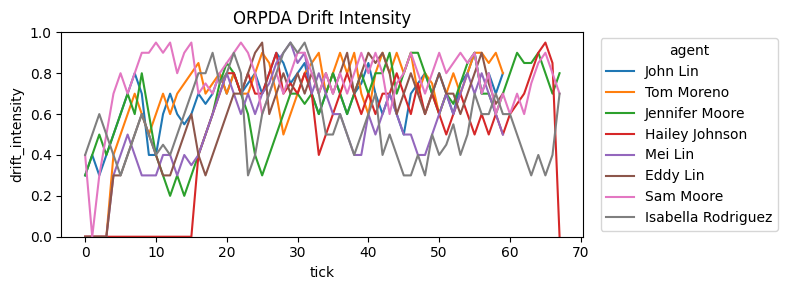

In [108]:
# -----------------------------------------------------
# Graph Drift
# -----------------------------------------------------
df = merged_df.copy()

plt.figure(figsize=(8, 3))
sns.lineplot(data=df, x="tick", y="drift_intensity", hue="agent", estimator="mean")
plt.title("ORPDA Drift Intensity")
plt.legend(loc="center left", bbox_to_anchor=(1.02, 0.5), title="agent")
plt.ylim(0,1)
plt.tight_layout()
plt.show()